In [1]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

---------------------

In [3]:
recup = pd.read_csv('./curados/curados.csv')

In [4]:
recup.shape

(61636, 20)

In [62]:
# dropeo todo o que tiene null (solo me quedo con lo robado y recuperado en este período.)
recup = recup.dropna()

In [10]:
recup.shape

(824, 20)

In [12]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'unico_duenio', 'fecha_recup',
       'dias'],
      dtype='object')

In [24]:
recup.dias.iloc[0]

'383 days 00:00:00.000000000'

In [31]:
recup.dias.iloc[0].split(' ')[0]

'383'

In [42]:
def daysonly(dias):
    return int(dias.split(' ')[0])

In [63]:
# genero una nueva columna donde el dato es solo la cantidad de dias como int
recup['dias_'] = recup['dias'].apply(daysonly)

In [44]:
recup.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_marca_descripcion,automotor_uso_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,unico_duenio,fecha_recup,dias,dias_
137,DENUNCIA DE ROBO O HURTO,2018-01-11,1988-09-06,ESTEBAN ECHEVERRIA Nº 1,Buenos Aires,Nacional,1988.0,FURGON,FORD,Privado,...,LUIS GUILLON,BUENOS AIRES,Masculino,1988.0,ARGENTINA,100.0,1.0,2019-01-29,383 days 00:00:00.000000000,383
188,DENUNCIA DE ROBO O HURTO,2018-01-31,2017-03-31,LANUS Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 5 PUERTAS,FIAT,Privado,...,LANUS,BUENOS AIRES,Masculino,1986.0,ARGENTINA,100.0,1.0,2018-09-25,237 days 00:00:00.000000000,237
305,DENUNCIA DE ROBO O HURTO,2018-01-11,1999-07-29,QUILMES Nº 1,Buenos Aires,Nacional,1999.0,SEDAN 3 PTAS,FIAT,Privado,...,BERNAL,BUENOS AIRES,Masculino,1996.0,ARGENTINA,100.0,1.0,2018-04-03,82 days 00:00:00.000000000,82
394,DENUNCIA DE ROBO O HURTO,2018-01-30,2017-12-07,BERAZATEGUI Nº 1,Buenos Aires,Nacional,2017.0,SEDAN 5 PUERTAS,PEUGEOT,Privado,...,BERAZATEGUI,BUENOS AIRES,Femenino,1968.0,ARGENTINA,100.0,1.0,2018-06-25,146 days 00:00:00.000000000,146
423,DENUNCIA DE ROBO O HURTO,2018-01-02,2012-05-03,SAN ISIDRO Nº 02,Buenos Aires,Importado,2012.0,SEDAN 5 PTAS,AUDI,Privado,...,BECCAR,BUENOS AIRES,Femenino,1967.0,ARGENTINA,100.0,1.0,2018-02-08,37 days 00:00:00.000000000,37


(0, 600)

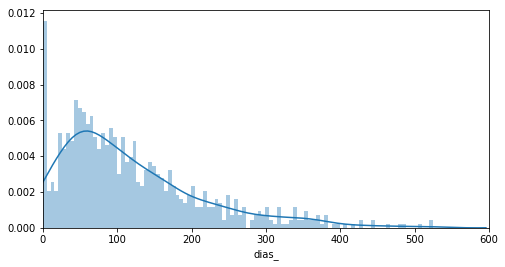

In [50]:
plt.figure(figsize= (8,4))
sns.distplot(recup.dias_, bins= 100)
plt.xlim(0,600)

In [51]:
recup.dias_.describe()

count    824.000000
mean     119.319175
std       97.238587
min        0.000000
25%       49.000000
50%       94.000000
75%      164.000000
max      525.000000
Name: dias_, dtype: float64

-------------------------------------------

# Voy a hacer una regresión para ver si puedo predecir días hasta recupero

## limpio features y feature engineering

In [57]:
recup.columns

Index(['tramite_tipo', 'tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'automotor_origen', 'automotor_anio_modelo',
       'automotor_tipo_descripcion', 'automotor_marca_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_localidad', 'titular_domicilio_provincia',
       'titular_genero', 'titular_anio_nacimiento', 'titular_pais_nacimiento',
       'titular_porcentaje_titularidad', 'unico_duenio', 'fecha_recup', 'dias',
       'dias_'],
      dtype='object')

In [56]:
recup.automotor_tipo_descripcion.nunique()
# si se puede mejorar esto se puede usar. evitar tantos para no sumar demasiadas features

33

In [64]:
recup.drop(['tramite_tipo', 'registro_seccional_descripcion', 'automotor_marca_descripcion', 'titular_domicilio_localidad',
            'dias', 'titular_porcentaje_titularidad'], axis= 1, inplace = True)

### separo variable a predecir de X

In [66]:
y = recup.dias_

In [72]:
X = recup[['tramite_fecha', 'fecha_inscripcion_inicial',
       'registro_seccional_provincia', 'automotor_origen',
       'automotor_anio_modelo', 'automotor_tipo_descripcion',
       'automotor_uso_descripcion', 'titular_tipo_persona',
       'titular_domicilio_provincia', 'titular_genero',
       'titular_anio_nacimiento', 'titular_pais_nacimiento', 'unico_duenio',
       'fecha_recup']]

In [73]:
origen_dummie= pd.get_dummies(recup.automotor_origen)
uso_dummie= pd.get_dummies(recup.automotor_uso_descripcion)
pais_tit_dummie = pd.get_dummies(recup.titular_pais_nacimiento)


In [79]:
prov_dummie= pd.get_dummies(recup.registro_seccional_provincia)

In [75]:
X['titular_pers_fisica'] = np.where(X['titular_tipo_persona'] == 'Física', 1, 0)

In [76]:
X['titular_masculino'] = np.where(X['titular_genero'] == 'Masculino', 1, 0)

In [80]:
X = X.join([prov_dummie, origen_dummie, uso_dummie, pais_tit_dummie])

In [81]:
X.drop(['registro_seccional_provincia', 'automotor_origen', 'automotor_uso_descripcion', 'titular_pais_nacimiento', 
       'titular_tipo_persona', 'titular_genero'], axis= 1, inplace = True)

In [83]:
#me quedó colgado tipo descripcion, después meterlo en el grupo de arriba
tipo_dummie = pd.get_dummies(recup.automotor_tipo_descripcion)

In [84]:
X = X.join([tipo_dummie])

In [85]:
X.drop('automotor_tipo_descripcion', axis = 1, inplace= True)

In [86]:
#dropear esto antes de arrancar
X.drop('titular_domicilio_provincia', axis = 1, inplace = True)

In [92]:
# ver si convertir o dropear fechas
X.drop(['tramite_fecha', 'fecha_inscripcion_inicial', 'fecha_recup'], axis = 1, inplace= True)

In [95]:
X.dtypes

automotor_anio_modelo      float64
titular_anio_nacimiento    float64
unico_duenio               float64
titular_pers_fisica          int32
titular_masculino            int32
                            ...   
SEDAN 5 PTAS                 uint8
SEDAN 5 PUERTAS              uint8
SEMIRREMOLQUE                uint8
TODO TERRENO                 uint8
UTILITARIO                   uint8
Length: 72, dtype: object

In [87]:
X.columns

Index(['tramite_fecha', 'fecha_inscripcion_inicial', 'automotor_anio_modelo',
       'titular_anio_nacimiento', 'unico_duenio', 'fecha_recup',
       'titular_pers_fisica', 'titular_masculino', 'Buenos Aires', 'Chubut',
       'Ciudad Autónoma de Bs.As.', 'Corrientes', 'Córdoba', 'Entre Ríos',
       'Jujuy', 'La Pampa', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro',
       'Salta', 'San Luis', 'Santa Fe', 'Tierra del Fuego', 'Importado',
       'Nacional', 'Protocolo 21', 'No declarado', 'Privado', 'Público',
       'ARGENTINA', 'BOLIVIA', 'BRASIL', 'CHILE', 'CHINA', 'COREA REPUBLICANA',
       'ESPANA', 'ITALIA', 'PARAGUAY', 'PERU', 'URUGUAY', 'VENEZUELA',
       'CAMION TRACTOR', 'CHASIS C/CABINA', 'COUPE', 'FAMILIAR', 'FURGON',
       'FURGON 800', 'FURGON VIDRIADO', 'FURGON VIDRIADO C/ASI',
       'FURGON VIDRIADO C/ASIENTOS', 'FURGON VIDRIADO CON ASIENTOS',
       'FURGONETA', 'MINIBUS', 'PICK UP', 'PICK-UP', 'PICK-UP CABINA DOBLE',
       'PICK-UP CABINA SIMPLE', 'RURAL', 'RURAL

## Feature selection?

----------------

# Importo librerias de regresión

In [88]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Hago cosita

In [96]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
#linear regression
lr = LinearRegression()

In [97]:
lr.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
ypred = lr.predict(Xtest)

In [99]:
np.sqrt(mean_squared_error(ytest, ypred))

97.35425217276183

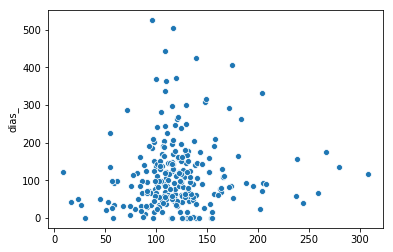

In [101]:
sns.scatterplot(ypred, ytest)

In [102]:
# KNN
neigh = KNeighborsRegressor(weights = "distance")

In [108]:
parameters_k = np.arange(1,31,1)


In [104]:
parameters_knn = [{'n_neighbors': parameters_k}]

In [109]:
regresor_neigh = GridSearchCV(neigh, parameters_knn, refit = True, cv= 5, verbose=True)

In [110]:
regresor_neigh.fit(Xtrain, ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([20, 25, 30])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [111]:
regresor_neigh.best_params_

{'n_neighbors': 30}

In [112]:
regresor_neigh.best_score_

-0.07513117461804335

In [113]:
ypred2 = regresor_neigh.predict(Xtest)


In [114]:
np.sqrt(mean_squared_error(ytest, ypred2))

94.88294918940561

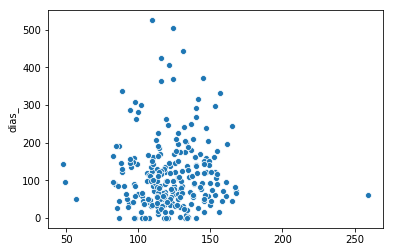

In [115]:
sns.scatterplot(ypred2, ytest)

In [117]:
# SVR
svreg = SVR()

In [118]:
parameters_svr = [{'kernel':['rbf', 'linear'] , 'C': [1,10,100],'gamma': [0.1,0.5] }]

In [119]:
regresor_svr = GridSearchCV(svreg, parameters_svr, cv= 5, verbose=True)

In [120]:
regresor_svr.fit(Xtrain, ytrain)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   36.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf', 'linear'], 'C': [1, 10, 100], 'gamma': [0.1, 0.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [121]:
regresor_svr.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}

In [122]:
regresor_svr.best_score_

-0.06553693225042063

In [124]:
ypred3 = regresor_svr.predict(Xtest)


In [125]:
np.sqrt(mean_squared_error(ytest, ypred3))

94.10379214287205

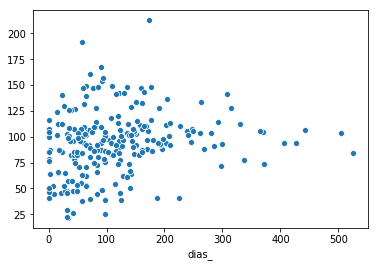

In [134]:
sns.scatterplot(ytest, ypred3)